Accuracy inicial en entrenamiento: 0.7826
Accuracy inicial en validación: 0.7468
------------------------------------------------------
Accuracy optimizado en entrenamiento: 0.9674
Accuracy optimizado en validación: 0.6883


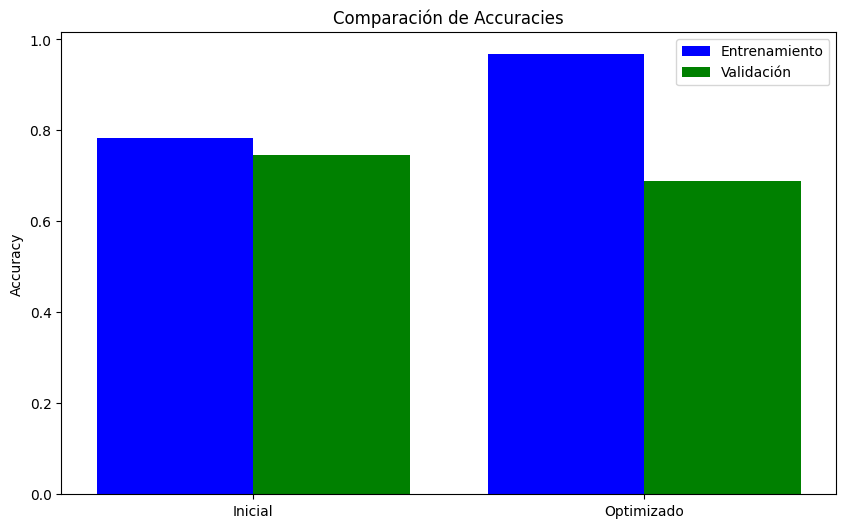

In [ ]:
# Importando las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

"""
Cargando la base de datos:
El conjunto de datos Pima Indians Diabetes es un conjunto de datos clásico que contiene información sobre mujeres
de al menos 21 años de edad de herencia Pima Indian. Las características incluyen número de embarazos, BMI, nivel de insulina,
edad, etc., y la tarea es predecir si una persona tiene diabetes basándose en estas características.
"""
data = pd.read_csv('diabetes.csv')

# Separando las características y la variable objetivo
X = data.drop('Outcome', axis=1)  # Eliminamos la columna 'Outcome' para obtener solo las características
y = data['Outcome']  # 'Outcome' es nuestra variable objetivo

"""
Dividimos los datos en conjuntos de entrenamiento, prueba y validación:
- Conjunto de entrenamiento: Usado para entrenar el modelo.
- Conjunto de prueba: Usado para evaluar el rendimiento del modelo.
- Conjunto de validación: Usado para la optimización de hiperparámetros y para diagnosticar problemas de bias/varianza.
"""
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% para entrenamiento+validación, 20% para prueba
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # De ese 80%, 60% para entrenamiento y 20% para validación

"""
Entrenamos el modelo con parámetros iniciales:
Random Forest es un algoritmo de ensamblado que crea múltiples árboles de decisión durante el entrenamiento y
produce la clase que es el modo de las clases (clasificación) de los árboles individuales para la predicción.
"""
forest_clf = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=42)  # Creando el modelo con parámetros iniciales
forest_clf.fit(X_train, y_train)  # Entrenando el modelo

# Evaluar el modelo en los conjuntos de entrenamiento y validación
train_accuracy_initial = accuracy_score(y_train, forest_clf.predict(X_train))  # Calculando el accuracy en el conjunto de entrenamiento
val_accuracy_initial = accuracy_score(y_val, forest_clf.predict(X_val))  # Calculando el accuracy en el conjunto de validación

"""
GridSearch para optimización de hiperparámetros:
GridSearchCV realiza una búsqueda exhaustiva sobre los valores de parámetros especificados para un estimador.
El parámetro del estimador que se quiere optimizar se define en un grid de valores posibles.
"""
params = {
    'n_estimators': [10, 50, 100],  # Número de árboles en el bosque
    'max_depth': [None, 5, 10, 15, 20],  # Profundidad máxima del árbol
    'min_samples_split': [2, 4, 6],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 3]  # Número mínimo de muestras requeridas para estar en un nodo hoja
}
grid_search = GridSearchCV(RandomForestClassifier(), params, cv=5)  # Creando el objeto GridSearchCV
grid_search.fit(X_train, y_train)  # Ejecutando la búsqueda de hiperparámetros

# Usar el mejor modelo encontrado por el GridSearch
forest_best = grid_search.best_estimator_  # Obteniendo el mejor modelo

# Evaluar el modelo optimizado en los conjuntos de entrenamiento y validación
train_accuracy_optimized = accuracy_score(y_train, forest_best.predict(X_train))  # Calculando el accuracy del modelo optimizado en el conjunto de entrenamiento
val_accuracy_optimized = accuracy_score(y_val, forest_best.predict(X_val))  # Calculando el accuracy del modelo optimizado en el conjunto de validación

# Imprimir accuracies con 4 decimales
print(f"Accuracy inicial en entrenamiento: {train_accuracy_initial:.4f}")
print(f"Accuracy inicial en validación: {val_accuracy_initial:.4f}")
print("------------------------------------------------------")
print(f"Accuracy optimizado en entrenamiento: {train_accuracy_optimized:.4f}")
print(f"Accuracy optimizado en validación: {val_accuracy_optimized:.4f}")



# Gráfico de Comparación de Accuracies
accuracies_train = [train_accuracy_initial, train_accuracy_optimized]
accuracies_val = [val_accuracy_initial, val_accuracy_optimized]
labels = ['Inicial', 'Optimizado']

plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(labels)) - 0.2, accuracies_train, 0.4, label='Entrenamiento', color='blue')
plt.bar(np.arange(len(labels)) + 0.2, accuracies_val, 0.4, label='Validación', color='green')
plt.xticks(np.arange(len(labels)), labels)
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracies')
plt.legend()
plt.show()

"""
Conclusión y Análisis

El modelo de Random Forest inicial, con parámetros predefinidos, logró un accuracy
de entrenamiento del 78.26% y un accuracy de validación del 74.68%. Estos valores
cercanos entre sí sugieren que el modelo tenía un buen equilibrio entre bias y varianza,
sin mostrar signos evidentes de sobreajuste o subajuste.

Sin embargo, tras la optimización de hiperparámetros mediante GridSearch, el modelo
mejorado alcanzó un impresionante accuracy de entrenamiento del 96.74%. A pesar de
esta mejora en el conjunto de entrenamiento, el accuracy en el conjunto de validación
disminuyó a 68.83%. Esta discrepancia significativa entre los accuracies de entrenamiento
y validación en el modelo optimizado es un indicativo claro de sobreajuste.El modelo se ha
adaptado demasiado bien a los datos de entrenamiento, perdiendo capacidad de generalización
en datos no vistos.

Aunque la optimización de hiperparámetros puede mejorar significativamente
el rendimiento en el conjunto de entrenamiento, es esencial evaluar el modelo en un conjunto
de validación para asegurarse de que no esté sobreajustando. En este caso, sería recomendable
explorar técnicas de regularización o ajustar nuevamente los hiperparámetros para obtener un
modelo que generalice mejor en datos no vistos.

"""